In [92]:
# 사이킷런에서 제공하는 당뇨병(diabetes) 환자 데이터
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [93]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [94]:
df_x = diabetes.data
df_y = diabetes.target

print(df_x.shape) # 10개의 특성을 가진 입력값이 총 442개 있음.
print(df_y.shape)

(442, 10)
(442,)


In [95]:
print(diabetes.feature_names) # 특성들의 이름을 출력

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [96]:
import numpy as np  
X = np.array(df_x) # 특성 값
y = np.array(df_y) # 타깃 값

In [97]:
# train 데이터와 test 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 10 )

In [98]:
# 모델 준비
# y = x1w1 + x2w2 +  ... + x9w9 + x10w10 + b
W = np.random.rand(10) # 10개의 특성값(x)에 대응하는 10개의 가중치(w) 준비
b = np.random.rand()  # 1개의 상수 b 준비

In [99]:
# 타깃 값을 예측하는 모델(일차 함수) 구현
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]  
    predictions += b
    return predictions

In [100]:
# Mean Square Error
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 오차의 제곱의 평균 값
    return mse

# 손실함수 loss 정의
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y) # 예측값과 실제 정답(타깃)의 차이 정도를 계산함.
    return L


In [101]:
# 기울기를 구하는 gradient 함수 구현

def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y) 
    
    # 모델이 예측한 값 준비
    y_pred = model(X, W, b)
    
    # 특성값 x가 여러 개(다변수)이므로 편미분 공식 활용
    dW = 1/N * 2 * X.T.dot(y_pred - y)  # w의 기울기
    db = 2 * (y_pred - y).mean()  # b의 기울기
    
    return dW, db


In [110]:
#하이퍼 파라미터인 학습률 설정
LEARNING_RATE = 1

In [119]:
#정의된 손실함수와 기울기 함수로 모델을 학습
losses = []

for i in range(1, 30000): 
    dW, db = gradient(X_train, W, b, y_train)  
    W -= LEARNING_RATE * dW  # 기울기가 양수이면 점점 뒤로 움직임.
    b -= LEARNING_RATE * db  # 기울기가 음수이면 점점 앞으로 움직임.
    L = loss(X_train, W, b, y_train)  
    losses.append(L) # 손실값(오차값)을 기록함.
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))  # loss값이 충분히 떨어질 때까지 학습을 진행함.


Iteration 100 : Loss 2851.0318
Iteration 200 : Loss 2851.0318
Iteration 300 : Loss 2851.0317
Iteration 400 : Loss 2851.0317
Iteration 500 : Loss 2851.0316
Iteration 600 : Loss 2851.0316
Iteration 700 : Loss 2851.0315
Iteration 800 : Loss 2851.0315
Iteration 900 : Loss 2851.0314
Iteration 1000 : Loss 2851.0314
Iteration 1100 : Loss 2851.0313
Iteration 1200 : Loss 2851.0313
Iteration 1300 : Loss 2851.0312
Iteration 1400 : Loss 2851.0312
Iteration 1500 : Loss 2851.0311
Iteration 1600 : Loss 2851.0311
Iteration 1700 : Loss 2851.0310
Iteration 1800 : Loss 2851.0310
Iteration 1900 : Loss 2851.0309
Iteration 2000 : Loss 2851.0309
Iteration 2100 : Loss 2851.0308
Iteration 2200 : Loss 2851.0308
Iteration 2300 : Loss 2851.0307
Iteration 2400 : Loss 2851.0307
Iteration 2500 : Loss 2851.0306
Iteration 2600 : Loss 2851.0306
Iteration 2700 : Loss 2851.0306
Iteration 2800 : Loss 2851.0305
Iteration 2900 : Loss 2851.0305
Iteration 3000 : Loss 2851.0304
Iteration 3100 : Loss 2851.0304
Iteration 3200 : 

Iteration 26600 : Loss 2851.0260
Iteration 26700 : Loss 2851.0260
Iteration 26800 : Loss 2851.0259
Iteration 26900 : Loss 2851.0259
Iteration 27000 : Loss 2851.0259
Iteration 27100 : Loss 2851.0259
Iteration 27200 : Loss 2851.0259
Iteration 27300 : Loss 2851.0259
Iteration 27400 : Loss 2851.0259
Iteration 27500 : Loss 2851.0259
Iteration 27600 : Loss 2851.0259
Iteration 27700 : Loss 2851.0259
Iteration 27800 : Loss 2851.0259
Iteration 27900 : Loss 2851.0259
Iteration 28000 : Loss 2851.0259
Iteration 28100 : Loss 2851.0259
Iteration 28200 : Loss 2851.0259
Iteration 28300 : Loss 2851.0259
Iteration 28400 : Loss 2851.0259
Iteration 28500 : Loss 2851.0258
Iteration 28600 : Loss 2851.0258
Iteration 28700 : Loss 2851.0258
Iteration 28800 : Loss 2851.0258
Iteration 28900 : Loss 2851.0258
Iteration 29000 : Loss 2851.0258
Iteration 29100 : Loss 2851.0258
Iteration 29200 : Loss 2851.0258
Iteration 29300 : Loss 2851.0258
Iteration 29400 : Loss 2851.0258
Iteration 29500 : Loss 2851.0258
Iteration 

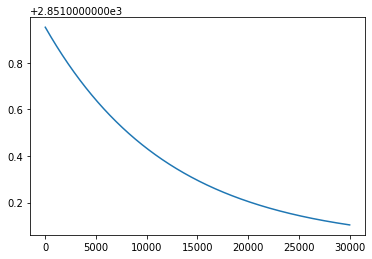

In [115]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [116]:
# test 데이터에 대한 성능 확인
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2913.0765871676863

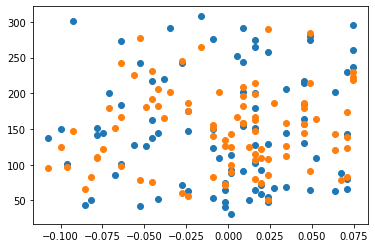

In [117]:
# 정답 데이터와 예측한 데이터 시각화하기
plt.scatter(X_test[:, 0], y_test) 
plt.scatter(X_test[:, 0], prediction) 
plt.show()
